## PRINCIPAL COMPONENT ANALYSIS 

_Iqra_:  Hi, Brother Ladle. This time I request you to explain to me about principal component analysis. 

_Ladle_: Hello! Iqra, sure tell me from where you have learned this.

_Iqra_: Maybe it's Machine Learning Techniques!!

_Ladle_: No Iqra! **PCA is not a Machine Learning Technique but an Unsupervised Machine Learning Algorithmthat is used for the dimensionality reduction.** Let's see in details.

_Ladle_: **Principal Component Analysis (PCA)** is an Unsupervised Machine Learning Algorithm, across various applications: _exploratory data analysis, dimensionality reduction, information compression, data de-noising, and plenty more!_ Let’s better understand PCA before we explore its workings. 
- PCA tries to find the lower-dimensional surface to project the high-dimensional data.

Imagine we have a 2-dimensional dataset. Each dimension can be represented as a feature column:
.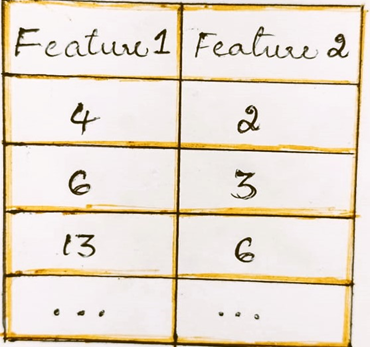

_Iqra_: **PCA can be represented in table form**. Am I right?

_Ladle_: We can represent the same dataset as a scatterplot: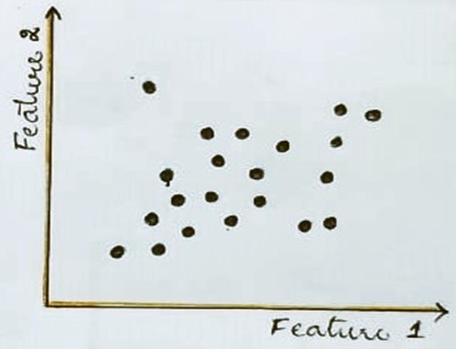

_The main aim of PCA is to find Principal Components, which can describe the data points with a set of... well, Principal Components._

**The key aim of PCA is to reduce the number of variables of a data set while preserving as much information as possible!**
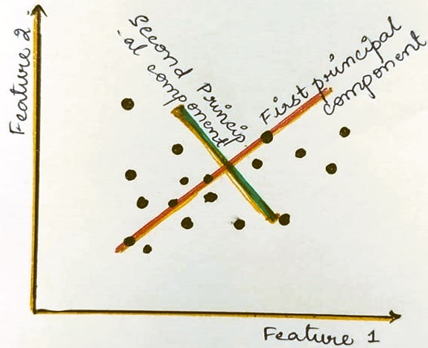


_Ladle_: We are creating a simple dataset with two features. First, we fit a PCA estimator to display the two principal components of this dataset, i.e., **the two directions that explain the most variance in the data**.

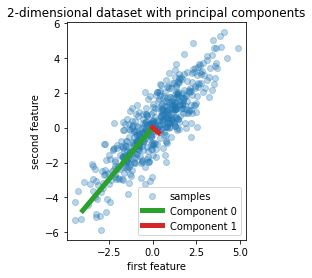

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

_Ladle_:  For this example, we now **define the target y so that it strongly correlates with a direction with minor variance.** To this end, we will project X onto the second component and add some noise to it.

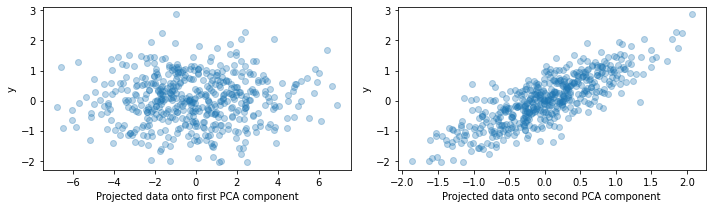

In [43]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

_Ladle:_ We plot the projected data for both models onto the first component against the target. In both cases, this projected data is what the regressors will use as training data.

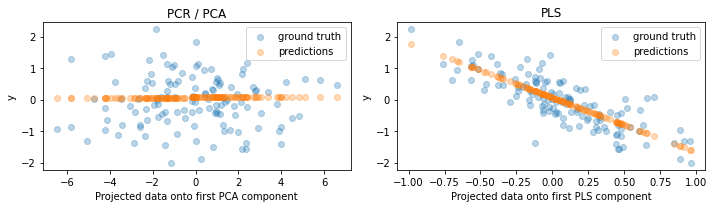

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()


_Ladle_: Print the R-squared scores of both estimators, which further confirms that PLS is a better alternative than PCR in this case. **A negative R-squared indicates that PCR performs worse than a regressor that would predict the mean of the target.**

In [45]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -0.026
PLS r-squared 0.658


In [46]:
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

PCR r-squared with 2 components 0.673


_Iqra_: Bro, **What is Principal Component?**

_Ladle_: _It is a statistical process that converts the observations of similar features into a set of linearly unequal features with the help of orthogonal transformation. These new transformed features are called the Principal Components._

Some properties of these principal components are:

- The principal component must be the linear combination of the original features.
- These components are orthogonal, i.e., the correlation between a pair of variables is zero.
- The importance of each component decreases from 1 to n, meaning the 1 PC has the most reputation, and the n PC will have minor significance.


_Iqra_: **Why is this useful?**

_Ladle_: Uses of PCA: 
- It is used to find interrelation between variables in the data.
- It is used to interpret and visualize data.
- The number of variables is decreasing, which makes further analysis simpler.
- It’s often used to visualize genetic distance and relatedness between populations.

In the small 2-dimensional example above, we do not gain much by using PCA since a feature vector of the form (feature1, feature2) will be very similar to a vector of the form (first principal component (PCA1), second principal component (PCA2)). But in huge datasets (where the number of dimensions can surpass 100 different variables), main components remove noise by reducing many features to just a couple of principal components. Principal components are orthogonal projections of data onto lower-dimensional space.

_Iqra_: This PCA seems quite complex. I am unable to understand.

_Ladle_: Ok fine. I will show you an example so you can clearly understand. look,

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
  
# instantiating
cancer = load_breast_cancer()
  
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
  
# checking head of dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

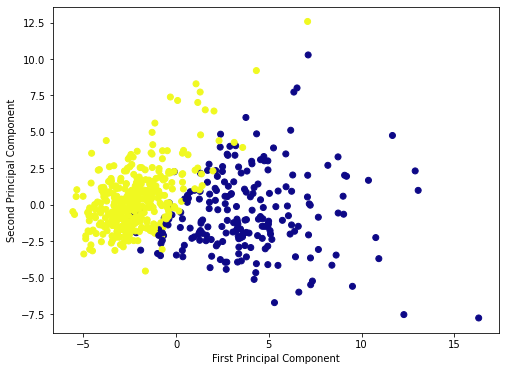

In [35]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [36]:
# components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

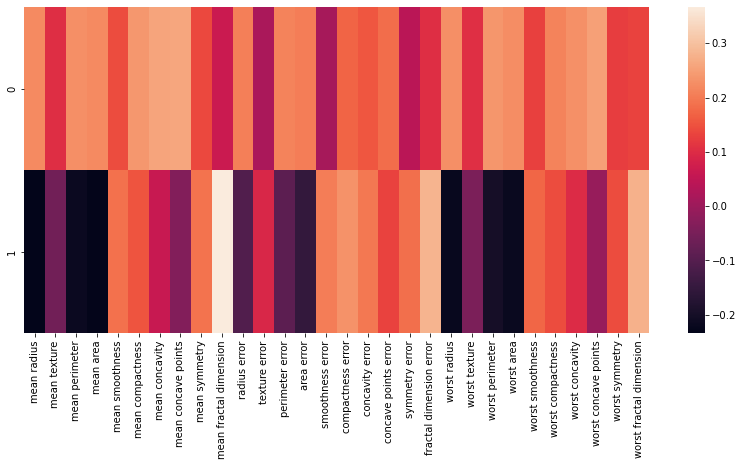

In [37]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

_Iqra_: I got it, bro.! 

- PCA produces the same principal components as features in the training dataset. 
In practice, though, we do not keep all of the principal components. Instead, each successive principal component explains the variance left after its primary component, so **picking just a few of the first components sufficiently approximates the original dataset without needing additional features.**
- The result is a new set of features in the form of principal components, which have multiple practical applications.

_Iqra_: The algorithm can be used on its own, or it can serve as a data cleaning or data preprocessing technique used before another Machine Learning Algorithm.

**PCA is used across a variety of use cases:**

1. Visualize multidimensional data. Data visualizations are a great tool for communicating multidimensional data as 2- or 3-dimensional plots.
2. Compress information. Principal Component Analysis is used to compress information to store and transmit data more efficiently.For example, it can be used to compress images without losing too much quality, or in signal processing. 
3. Simplify complex business decisions.
4. Clarify convoluted scientific processes. The algorithm has been applied extensively  in the understanding of convoluted and multidirectional factors, which increase the probability of neural ensembles to trigger action potentials.


_Ladle_: Good. When PCA is used as part of preprocessing, the algorithm is applied to:

1. Reduce the number of dimensions in the training dataset.
2. De-noise the data. Because PCA is computed by finding the components which explain the most significant amount of variance, it captures the signal in the data and omits the noise.

_Iqra_: **How is PCA calculated?** as far as I know, there are multiple ways to calculate PCA.
1. Standardize the range of continuous initial variables.
2. Compute the covariance matrix to identify correlations.
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components.
4. Create a feature vector to decide which principal components to keep.
5. Recast the data along the axes of the principal component.

Can you **explain these steps** to me with an example?

 _Ladle_: It's good, Iqra, that most of the things you already knew about PCA. Let me explain to you these steps.

**STEP1: STANDARDIZATION**
    This step _aims to standardize the range of the continuous initial variables so that each one contributes equally to the analysis._
More specifically, it is critical to perform standardization before PCA because the latter is quite sensitive regarding the variances of the initial variables. That is **if there are significant differences between the ranges of initial variables, those variables with more extensive ranges will dominate over those with small ranges** which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.
- Mathematically, this can be done by subtracting the mean and dividing it by the standard deviation for each variable's value. 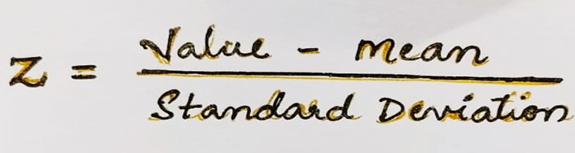
_Once the standardization is done, all the variables will be transformed to a small scale._

**STEP 2: COVARIANCE MATRIX COMPUTATION**
This step aims to understand how the variables of the input data set vary from the mean concerning each other, or in other words, to see if there is any relationship between them. 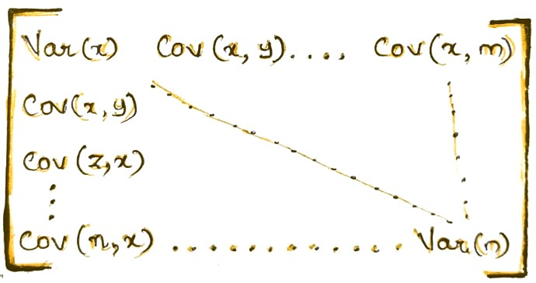 Since the covariance of a variable with itself is its **variance (Cov(a, a)=Var(a))**, in the main diagonal, we have the variances of each initial variable. And since the **covariance is commutative (Cov(a,b)=Cov(b, a))**, the entries of the covariance matrix are symmetric for the main diagonal, 
- which means that the upper and the lower triangular portions are equal.

_Iqra_: **What do the covariances that we have as entries of the matrix tell us about the correlations between the variables?**

_Ladle_: It’s the sign of **the covariance that matters:**

- if positive, then: the two variables increase or decrease together (correlated)
- if negative, then: One increases when the other decreases (Inversely correlated)


Now that we know that the covariance matrix is not more than a table that summarizes the correlations between all the possible pairs of variables, the next step.

**STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS.**
Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix to determine the principal components of the data. To calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.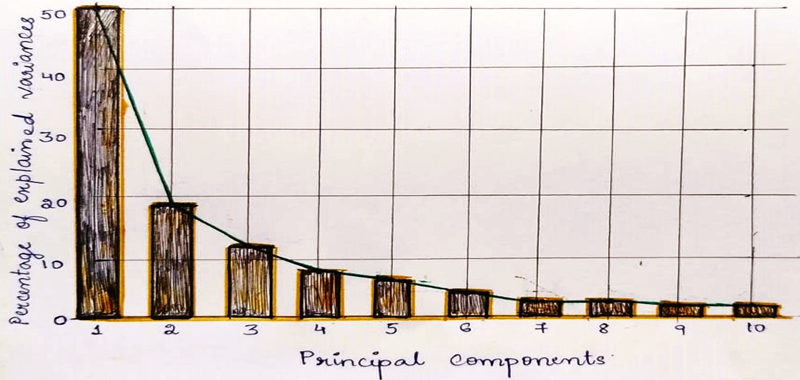

**STEP 4:FEATURE VECTOR**
Calculate the new features. To do this, we will multiply the P* matrix by the Z. In the resultant matrix Z*, each observation is the linear combination of original features. Each column of the Z* matrix is independent of the other.

Example:
Continuing with the example from the previous step, we can either form a feature vector with both of the eigenvectors v1 and v2: 
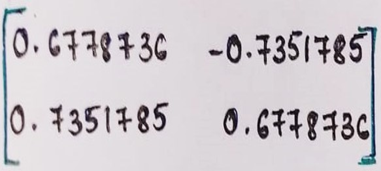
Principal Component Analysis Eigenvectors Or discard the eigenvector v2, which is the one of lesser significance, and form a feature vector with v1 only: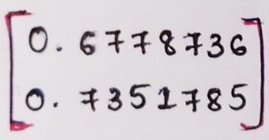

**LAST STEP: RECAST THE DATA ALONG THE PRINCIPAL COMPONENTS AXES**
In the previous steps, apart from standardization, you do not make any changes to the data; you select the principal components and form the feature vector, but the input data set always remains in terms of the original axes (i.e., in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix to reorient the data from the original axes to the ones represented by the principal components (hence the name Principal Components Analysis). This can be done by multiplying the original data set's transpose by the feature vector's transpose.

_Ladle:_ Up to now, whatever I have explained from that, can you tell me **what the advantages and disadvantages of PCA are?**

_Iqra_: Yes, bro! as for **Advantages:**
- Easy to compute. PCA is based on linear algebra, which is computationally easy to solve by computers.
- Speeds up other machine learning algorithms. Machine learning algorithms converge faster when trained on principal components than the original dataset.
- Counteracts the issues of high-dimensional data. High-dimensional data causes regression-based algorithms to overfit easily. By using PCA beforehand to lower the dimensions of the training dataset, we prevent the predictive algorithms from overfitting. 

 **Disadvantages are:**
- Low interpretability of principal components.
- The trade-off between information loss and dimensionality reduction. 

_Ladle:_  Let's see implementation. First, we _create the Data with Scikit-Learn._

In [38]:
import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

_Ladle:_  _Plot the figure in PCA form._

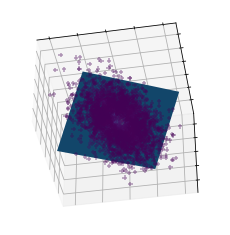

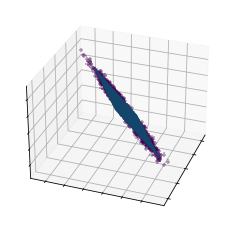

In [41]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()